In [1]:
from networkx.algorithms import bipartite
from itertools import combinations
from scipy.optimize import curve_fit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import networkx as nx 
import seaborn as sns 
%matplotlib inline 

In [2]:
DF = pd.read_csv('data/wikis_table_anon.csv',header=0,low_memory=False)

In [3]:
DF['SignedEditSize'] = np.abs(DF['SignedEditSize'].values)

In [4]:
DF = DF.sort_values(by=['EditTime'])

In [5]:
DF['SetA'] = [i.strip()+':'+str(j) for i,j in zip(DF['PageName'],DF['SectionID'])]

In [6]:
DF.head()

,Year,TeamID,UserID,UserType,PageName,SectionID,ActionType,EditTime,SignedEditSize,SetA
47459,2008,128,IGEM HQ,igemHQ,Team:MIT/Notebook,2.0,create,2008-05-12 21:10:14+00:00,0.0,Team:MIT/Notebook:2.0
47174,2008,128,IGEM HQ,igemHQ,Team:MIT,0.0,create,2008-05-12 21:10:14+00:00,2338.0,Team:MIT:0.0
47279,2008,128,IGEM HQ,igemHQ,Team:MIT/Team,0.0,create,2008-05-12 21:10:14+00:00,3015.0,Team:MIT/Team:0.0
47280,2008,128,IGEM HQ,igemHQ,Team:MIT/Team,2.0,create,2008-05-12 21:10:14+00:00,0.0,Team:MIT/Team:2.0
47281,2008,128,IGEM HQ,igemHQ,Team:MIT/Team,6.0,create,2008-05-12 21:10:14+00:00,0.0,Team:MIT/Team:6.0


In [7]:
DF['EditTime'] = pd.to_datetime(DF['EditTime'],format='%Y-%m-%d')

In [8]:
DF['days'] = (DF['EditTime'] - DF.iloc[0]['EditTime']).dt.days

In [9]:
DF['week'] = DF['days'].apply(lambda x: np.floor_divide(x,7))

In [10]:
# df_grouped = DF.groupby('week') ## not correct - grouping by week doesn't mean anything

In [11]:
df_group_teams = DF.groupby('TeamID')

In [12]:
# Edges = [len(j) for i,j in df_grouped.groups.items()]

Edges_teams = [(i,len(j)) for i,j in df_group_teams.groups.items()]

In [13]:
Edges_teams = sorted(Edges_teams, key=lambda x:x[1],reverse=True)
Edges_teams[:10]

[(797, 21336),
 (1319, 18467),
 (863, 13189),
 (1159, 11884),
 (801, 9956),
 (302, 9679),
 (136, 9119),
 (1541, 8835),
 (1446, 8664),
 (257, 8194)]

In [14]:
# plt.figure(figsize=(5,4))
# # plt.plot(Edges)

# plt.plot(Edges_teams)
# # plt.xscale('log')
# # plt.yscale('log')
# plt.xlabel('Weeks from Start')
# plt.ylabel('Edges')
# plt.tight_layout()

In [15]:
def return_bipartite_graph(D_grouped,group_id):
    
    df = D_grouped.get_group(group_id)
    
    topNodes = list(set(df['UserID']))
    btmNodes = list(set(df['SetA']))
    
    edges = list(zip(df['UserID'].values,df['SetA'].values))
    
    G = nx.Graph()
    G.add_nodes_from(topNodes,bipartite=0)
    G.add_nodes_from(btmNodes,bipartite=1)
    G.add_edges_from(edges)
    
    return G,topNodes,btmNodes

def plot_bipartite_network(D_grouped,group_id,lbl):
    
    G,T,B = return_bipartite_graph(D_grouped,group_id)
    
    node_color = []
    for i in G.nodes:
        
        if i in T:
            node_color.append('#fc8d62')
        else:
            node_color.append('#8da0cb')
    
    plt.figure(figsize=(4,4))
    pos = nx.nx_agraph.graphviz_layout(G)
    nx.draw(G,pos=pos,node_color=node_color,alpha=0.8,node_size=10,edge_color='lightgray',width=0.3)
    plt.savefig('plots/example_%s_%s.png'%(lbl,group_id),dpi=1000, transparent=True)
    print(f' # Top Nodes (Users) - {len(T)} \n # Bottom Nodes (Sections) - {len(B)} \n # Edges - {len(G.edges)}')
    return None

 # Top Nodes (Users) - 23 
 # Bottom Nodes (Sections) - 1162 
 # Edges - 2015


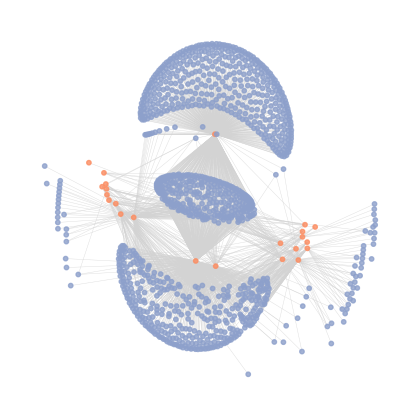

In [16]:
plot_bipartite_network(df_group_teams,257,'team')

In [17]:
G,B,T = return_bipartite_graph(df_group_teams,257)
BiAdj = bipartite.biadjacency_matrix(G,row_order=B,column_order=T).toarray()

In [18]:
np.savetxt('graph_matrices/test.csv',BiAdj,delimiter=',')

In [19]:
from tqdm import tqdm
import subprocess

cmd = r'''cd /Users/chakreshsingh/Documents/bipartite_growth_models/ | Rscript mat_temp.R'''

x = float(subprocess.check_output(cmd, shell=True))

In [20]:
x

0.6626443

In [21]:
# Nestedness = {}

# label = 'Weeks'

# for wk in tqdm(df_grouped.groups.keys()):
    
#     G,T,B = return_bipartite_graph(df_grouped,wk)
#     BiAdj = bipartite.biadjacency_matrix(G,row_order=B,column_order=T).toarray()
#     np.savetxt('graph_matrices/test.csv',BiAdj,delimiter=',')
    
#     try:
        
#         x = float(subprocess.check_output(cmd, shell=True))
#         Nestedness[wk] = x
#     except:
#         pass
    

In [22]:
# import json

# with open('Nestedness_%s.json'%(label),'w') as f:
    
#     json.dump(Nestedness,f,indent=1)

In [23]:
# N = np.array(list(Nestedness.values()))/max(Nestedness.values())
# E = np.array(Edges)/max(Edges) 
# Ew = list(df_grouped.groups.keys())
# Nw = list(Nestedness.keys())

In [24]:
# fig = plt.figure(figsize=(8,3))
# ax1 = fig.add_subplot(111)
# ax1.plot(Ew,E,label='Edges')
# ax2 = ax1.twinx()
# ax2.plot(Nw,N, color='darkorange', label='Nestedness')


# ax1.set_ylabel('Edges')
# ax2.set_ylabel('Nestedness')

# ax1.set_xlabel('Week')

In [25]:
import powerlaw as pw

In [26]:
# results = pw.Fit(list(dict(G.degree(T)).values()),discrete=True)
# results.power_law.alpha

# results.distribution_compare('power_law','lognormal_positive',normalized_ratio=True)

In [27]:
def get_powerlaw_fit(degree_list):
    
    try:
        result = pw.Fit(degree_list,discrete=True)
        alpha = np.round(result.power_law.alpha,2)
    except:
        alpha=0
        
    return alpha


def get_bip_degree_Metrics(G,T,B):
    
    '''
    returns the degreee metrics for the bipartite Graph
    
    avg_degrees for top and bottom nodes 
    alpha for the power law fits for top and btm nodes 
    
    
    Note: This is not the projection graph but degrees in the bipartite mode
    '''
    
    topNodes_degrees = list(dict(G.degree(T)).values())
    btmNodes_degrees = list(dict(G.degree(B)).values())
    
    avgK_top = np.average(topNodes_degrees)
    avgK_btm = np.average(btmNodes_degrees)
    
    alpha_top = get_powerlaw_fit(topNodes_degrees)
    alpha_btm = get_powerlaw_fit(btmNodes_degrees)
        
    return avgK_top,alpha_top,avgK_btm,alpha_btm


def get_proj_degree_Metrics(G,T,B):
    
    G_top = bipartite.collaboration_weighted_projected_graph(G,T)
    G_btm = bipartite.collaboration_weighted_projected_graph(G,B)
    
    topNodes_degrees = list(dict(G_top.degree()).values())
    btmNodes_degrees = list(dict(G_btm.degree()).values())
    
    alpha_top = get_powerlaw_fit(topNodes_degrees)
    alpha_btm = get_powerlaw_fit(btmNodes_degrees)
    
    try:
        corr_top = np.round(nx.degree_pearson_correlation_coefficient(G_top),2)
    except:
        corr_top = 0
    try:
        corr_btm = np.round(nx.degree_pearson_correlation_coefficient(G_btm),2)
    except:
        corr_btm = 0
        
    return alpha_top,corr_top,alpha_btm,corr_btm


In [28]:
%%capture --no-display

# get_bip_degree_Metrics(G,T,B)
get_proj_degree_Metrics(G,T,B)

(5.37, -0.11, 4.62, -0.24)

In [29]:
def get_TopBtm_contributors(DF):
    
    '''
    gives the top 5 and bottom 5 contributors by |SignedEditSize| for Graph with more than 10 unique contributors 
    else we consider contribution 0
    
    We ignore the edits by user - "IGEM HQ" 
    
    '''
    
    df = DF.groupby('UserID')['SignedEditSize'].sum().sort_values()
    
    user,editSize = df.index.to_list(),list(df.values)
    
    if "IGEM HQ" in user: #### we remove the "IGEM HQ" from the user list 
    
        idx = user.index("IGEM HQ")
        user.pop(idx)
        editSize.pop(idx)

    if len(user) >=10:
        
        top5 = editSize[::-1][:5]
        btm5 = editSize[:5]
    
    else:
        
        top5 = [0]*5
        btm5 = [0]*5
        
#         top5 = [editSize[0]]*5  ### if we want to consider the top and btm most contribution as a proxy
#         btm5 = [editSize[-1]]*5
        
    return top5,btm5


def get_gini(DF) -> float:
    
    '''
    gives contributions by |SignedEditSize| for Graph we calculate the gini coefficient.
    
    returns 
        > gini co-efficient of contributions 
        > size of the team
    
    We ignore the edits by user - "IGEM HQ" 
    
    '''
    
    df = DF.groupby('UserID')['SignedEditSize'].sum().sort_values()
    
    user,editSize = df.index.to_list(),list(df.values)
    
    if "IGEM HQ" in user: #### we remove the "IGEM HQ" from the user list 
    
        idx = user.index("IGEM HQ")
        user.pop(idx)
        editSize.pop(idx)
    
    editSize.sort()
    
    diffs = [np.abs(i-j) for i,j in combinations(editSize,2)]
    
    gini = np.sum(diffs)/(2*(len(editSize)**2)*np.mean(editSize))
    
    return np.round(gini,3),len(editSize)

In [30]:
df_test = df_group_teams.get_group(414)

get_gini(df_test)

(0.372, 14)

In [31]:
# df_list = {'team':df_group_teams}

# # pipeline = [('bip_metrics',get_bip_degree_Metrics),('proj_metrics',get_proj_degree_Metrics),\
# #             ('get_contri',get_TopBtm_contributors)]

# # def apply(G,T,B,pipeline):
    
# #     msr = {'avgK_bip_top':0,'avgK_bip_btm':0}
    
# #     for name,func in pipeline:


# for lbl in df_list:
    
#     print(lbl)
    
#     groupd_df = df_list[lbl]
    
#     D = {}
    
#     for grp in tqdm(list(groupd_df.groups.keys())):
        
    
#         graph_id = '%s_%d'%(lbl,grp)

#         msr = {}
        
#         msr['ID'] = graph_id
#         G,T,B = return_bipartite_graph(groupd_df,grp)

#         avgK_bip_top,alpha_bip_top,avgK_bip_btm,alpha_bip_btm = get_bip_degree_Metrics(G,T,B)
#         alpha_proj_top,corr_proj_top,alpha_proj_btm,corr_proj_btm = get_proj_degree_Metrics(G,T,B)

#         df = groupd_df.get_group(grp)

#         gini,size = get_gini(df)


#         msr['avgK_bip_top'] = avgK_bip_top
#         msr['alpha_bip_top'] = alpha_bip_top
#         msr['avgK_bip_btm'] = avgK_bip_btm
#         msr['alpha_bip_btm'] = alpha_bip_btm
#         msr['alpha_proj_top'] = alpha_proj_top
#         msr['corr_proj_top'] = corr_proj_top
#         msr['alpha_proj_btm'] = alpha_proj_btm
#         msr['corr_proj_btm'] = corr_proj_btm
#         msr['gini-coeff'] = gini
#         msr['teamSize'] = size
        
#         D[graph_id] = msr
        
#     DF = pd.DataFrame.from_dict(D,orient='index')
    
#     DF.to_csv('%s_dataframe.csv'%lbl,sep=',',header=True)

In [32]:
#### Reading Dataframe 

DF = pd.read_csv('team_dataframe.csv',sep=',',header=0,index_col=0)

In [33]:
DF.head()

,ID,avgK_bip_top,alpha_bip_top,avgK_bip_btm,alpha_bip_btm,alpha_proj_top,corr_proj_top,alpha_proj_btm,corr_proj_btm,gini-coeff,teamSize
team_76,team_76,12.000000,2.63,1.846154,4.59,7.09,-0.58,1.90,-0.04,0.319,7
team_77,team_77,7.777778,1.45,1.842105,3.82,4.66,-0.52,9.83,0.19,0.396,8
team_78,team_78,16.500000,1.49,2.129032,3.00,3.04,-0.67,6.78,-0.18,0.168,3
team_79,team_79,16.642857,2.13,2.026087,3.04,9.10,-0.21,2.01,0.02,0.401,13
team_80,team_80,14.250000,4.81,2.035714,3.54,NaN,NaN,7.15,-0.10,0.265,3


In [34]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2296 entries, team_76 to team_2897
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2296 non-null   object 
 1   avgK_bip_top    2296 non-null   float64
 2   alpha_bip_top   2246 non-null   float64
 3   avgK_bip_btm    2296 non-null   float64
 4   alpha_bip_btm   2249 non-null   float64
 5   alpha_proj_top  1595 non-null   float64
 6   corr_proj_top   1616 non-null   float64
 7   alpha_proj_btm  2048 non-null   float64
 8   corr_proj_btm   2079 non-null   float64
 9   gini-coeff      2280 non-null   float64
 10  teamSize        2296 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 215.2+ KB


In [35]:
### filling NA by meidans
for col in DF.columns[1:]:
    DF[col].fillna(DF[col].median(),inplace=True)



In [36]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2296 entries, team_76 to team_2897
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2296 non-null   object 
 1   avgK_bip_top    2296 non-null   float64
 2   alpha_bip_top   2296 non-null   float64
 3   avgK_bip_btm    2296 non-null   float64
 4   alpha_bip_btm   2296 non-null   float64
 5   alpha_proj_top  2296 non-null   float64
 6   corr_proj_top   2296 non-null   float64
 7   alpha_proj_btm  2296 non-null   float64
 8   corr_proj_btm   2296 non-null   float64
 9   gini-coeff      2296 non-null   float64
 10  teamSize        2296 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 215.2+ KB


In [37]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [38]:
features = DF.columns[1:]

In [39]:
X = ss.fit_transform(DF[features])

In [40]:
from sklearn.manifold import TSNE

In [41]:
tsne = TSNE(n_components=2, learning_rate=100,perplexity=10,random_state=43)

In [42]:
X_t = tsne.fit_transform(X)

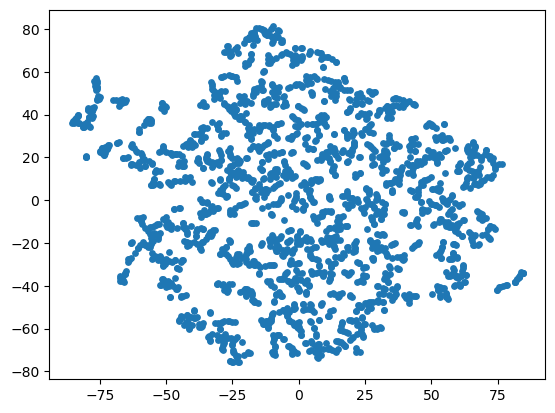

In [43]:
plt.scatter(X_t[:,0],X_t[:,1],s=15)

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

In [45]:
CS = cosine_similarity(X,dense_output=True)

In [46]:
labels = DF['ID'].values.tolist()

In [47]:
thresh = 0.85

Graph_Edges = []

for i in range(len(labels)):

    for j in range(i+1,len(labels)):

        if CS[i][j] >= thresh:

            Graph_Edges.append((labels[i],labels[j]))


In [48]:
# Th = np.linspace(0.6,0.99,50)


# Nc = []
# N = []
# Gcc = []
# E = []


# for thresh in tqdm(Th):
#     Graph_Edges = []
#     G = nx.Graph()
    
#     for i in range(len(labels)):

#         for j in range(i+1,len(labels)):

#             if CS[i][j] >= thresh:

#                 Graph_Edges.append((labels[i],labels[j]))

    
#     E.append(len(Graph_Edges))
#     G.add_edges_from(Graph_Edges)
#     N.append(len(G.nodes))
#     Nc.append(nx.number_connected_components(G))
#     Gcc.append(len(max(nx.connected_components(G),key=len)))

In [49]:
# plt.figure(figsize=(4,4))
# plt.plot(Th,E,'--o',label='Edges')
# plt.plot(Th,N,'--s',label='Nodes')
# plt.plot(Th,Nc,'--d',label='Components')
# plt.plot(Th,Gcc,'--p',label='GCC')
# plt.yscale('log')
# plt.xlabel('Threshold')
# plt.legend()
# plt.tight_layout()
# plt.savefig('plots/teams_graph_msr.png',dpi=600)
# plt.show()

In [50]:
# with open('teams_graphs.csv','w') as f:
    
#     f.write('source,target\n')
#     for e in Graph_Edges:
        
#         f.write('%s,%s\n'%(e[0],e[1]))

In [51]:
def user_obj_cdf(k,k0,r,s):
    
    return 1 - ((k+k0)/k0)**(-r/s)

def ramasco_pdf(k,y,n):
    
    return (k+(y-0.5)*(n-1))**(-y)

def ramasco_cdf(k,y,n=10):
    
    return -1*(y*(k+(n-1)(y-0.5))**(-y))/(k+(n-1)(y-0.5))

In [52]:
def get_cdf(arr):
    
    unique = sorted(np.unique(arr))
    
    cdf = np.zeros(len(unique))
    
    for i,val in enumerate(sorted(unique)):
        
        cdf[i] = np.sum(arr<=val)/len(arr)
        
    return cdf

In [55]:
from sklearn.metrics import r2_score
from scipy.stats import ks_2samp

def fit_cdf(model,xdata,ydata,metric='ks'):
    
    try:
        
        params,pcov = curve_fit(model,xdata,ydata)
        y_pred = model(xdata,*params)

        if metric=='ks':
            
            return ks_2samp(y_pred,ydata,alternative='two-sided')
        else:
        
            return r2_score(ydata,y_pred)

    except:
        
        return np.nan

In [108]:
import warnings

warnings.filterwarnings('ignore')

df_list = {'team':df_group_teams}

# pipeline = [('bip_metrics',get_bip_degree_Metrics),('proj_metrics',get_proj_degree_Metrics),\
#             ('get_contri',get_TopBtm_contributors)]

# def apply(G,T,B,pipeline):
    
#     msr = {'avgK_bip_top':0,'avgK_bip_btm':0}
    
#     for name,func in pipeline:


Fit = {}

R2 = {}
KS = {}

for lbl in df_list:
    
    print(lbl)
    
    groupd_df = df_list[lbl]
    
    D = {}
    
    for grp in tqdm(list(groupd_df.groups.keys())):
        
    
        graph_id = '%s_%d'%(lbl,grp)

        msr = {}
        
        msr['ID'] = graph_id
        G,T,B = return_bipartite_graph(groupd_df,grp)
        
#         G_top = bipartite.collaboration_weighted_projected_graph(G,T)
        G_btm = bipartite.collaboration_weighted_projected_graph(G,B)
        
#         topNodes_proj_degrees = list(dict(G_top.degree()).values())
        btmNodes_proj_degrees = list(dict(G_btm.degree()).values())

        topDeg = list(dict(G.degree(T)).values())
    
        btmNodes_proj_degrees = np.array(sorted(btmNodes_proj_degrees))
        topDeg = np.array(sorted(topDeg))
        
        
        cdf_btmProj = get_cdf(btmNodes_proj_degrees)
        cdf_top = get_cdf(topDeg)
        
        x1 = sorted(np.unique(topDeg))
        x2 = sorted(np.unique(btmNodes_proj_degrees))
        
#         msr['KS_Ramasco'] = fit_cdf(ramasco_cdf,x2,cdf_btmProj)
        msr['KS_UOM'] = fit_cdf(user_obj_cdf,x1,cdf_top)
        
        D[graph_id] = msr
        
        
#         plt.plot(x1,cdf_top,'--o')
#         plt.plot(x2,cdf_btmProj,'--s')
#         plt.show()
        

team


100%|███████████████████████████████████████| 2296/2296 [00:49<00:00, 46.01it/s]


In [109]:
# a = np.array([1,2,3,4,5,2,3,1,7,5,3,5,4,4,3,4,3,9,8,7])
# cdf_a = get_cdf(a)
# plt.plot(sorted(np.unique(a)),cdf_a,'--o')

In [110]:
from sympy import *

In [111]:
n = Symbol('n')
y = Symbol('y')
k=Symbol('k')

In [112]:
diff((k+(y-0.5)*(n-1))**(-y),k)

-y/((k + (n - 1)*(y - 0.5))*(k + (n - 1)*(y - 0.5))**y)

In [113]:
DF_r2 = pd.DataFrame.from_dict(D,orient='index')

In [114]:
DF_r2

,ID,KS_UOM
team_76,team_76,"(0.16666666666666666, 0.9999999999999998)"
team_77,team_77,"(0.16666666666666666, 0.9999999999999998)"
team_78,team_78,NaN
team_79,team_79,"(0.08333333333333333, 1.0)"
team_80,team_80,"(0.25, 1.0)"
...,...,...
team_2892,team_2892,NaN
team_2893,team_2893,"(0.2857142857142857, 0.9627039627039629)"
team_2895,team_2895,"(0.14285714285714285, 0.9999609537692629)"
team_2896,team_2896,"(0.2857142857142857, 0.9627039627039629)"


In [115]:
# DF_r2['R2_UOM'].fillna(np.nanmean(DF_r2['R2_UOM'].values),inplace=True)

In [116]:
import seaborn as sns

In [117]:
ks_dist = []

for ks in DF_r2.KS_UOM.values:
    if type(ks) != float:
        dk,p = ks[0],ks[1]
        if p>0.05:
            ks_dist.append(dk)

Text(0, 0.5, 'KS Statistic , p-value> 0.05')

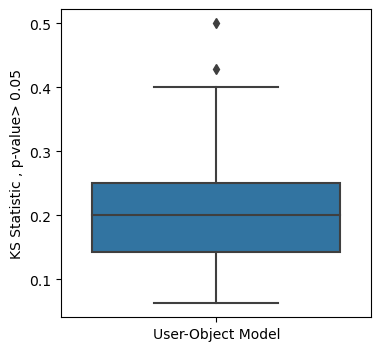

In [118]:
plt.figure(figsize=(4,4))
sns.boxplot(ks_dist)
plt.xticks([0],labels=['User-Object Model'])
plt.ylabel('KS Statistic , p-value> 0.05')

In [119]:
# DF_r2.info()

In [122]:
DF = pd.read_csv('team_dataframe.csv',sep=',',header=0,index_col=0)

In [123]:
DF

,ID,avgK_bip_top,alpha_bip_top,avgK_bip_btm,alpha_bip_btm,alpha_proj_top,corr_proj_top,alpha_proj_btm,corr_proj_btm,gini-coeff,teamSize
team_76,team_76,12.000000,2.63,1.846154,4.59,7.09,-0.58,1.90,-0.04,0.319,7
team_77,team_77,7.777778,1.45,1.842105,3.82,4.66,-0.52,9.83,0.19,0.396,8
team_78,team_78,16.500000,1.49,2.129032,3.00,3.04,-0.67,6.78,-0.18,0.168,3
team_79,team_79,16.642857,2.13,2.026087,3.04,9.10,-0.21,2.01,0.02,0.401,13
team_80,team_80,14.250000,4.81,2.035714,3.54,NaN,NaN,7.15,-0.10,0.265,3
...,...,...,...,...,...,...,...,...,...,...,...
team_2892,team_2892,26.000000,NaN,1.000000,NaN,NaN,0.00,NaN,NaN,NaN,0
team_2893,team_2893,10.300000,1.42,3.961538,6.76,3.42,-0.43,NaN,NaN,0.346,9
team_2895,team_2895,11.571429,1.60,2.131579,4.86,5.41,-0.37,4.45,-0.19,0.190,6
team_2896,team_2896,9.444444,4.82,2.741935,8.05,3.04,-0.56,8.61,-0.16,0.420,8
